In [49]:
using BasisFunctions
using FrameFuns
using PyPlot
using Interact, Reactive

  likely near /Users/roelmatthysen/.julia/v0.4/Interact/src/IJulia/setup.jl:153
  likely near /Users/roelmatthysen/.julia/v0.4/Interact/src/IJulia/setup.jl:157
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in require at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dyl

### One-dimensional approximations

In [50]:
f1 = ExpFun( x-> x)

A 1-dimensional FrameFun with 61 degrees of freedom.
Basis: Fourier series, mapped to [ -2.0  ,  2.0 ]
Domain: the interval [-1.0, 1.0]


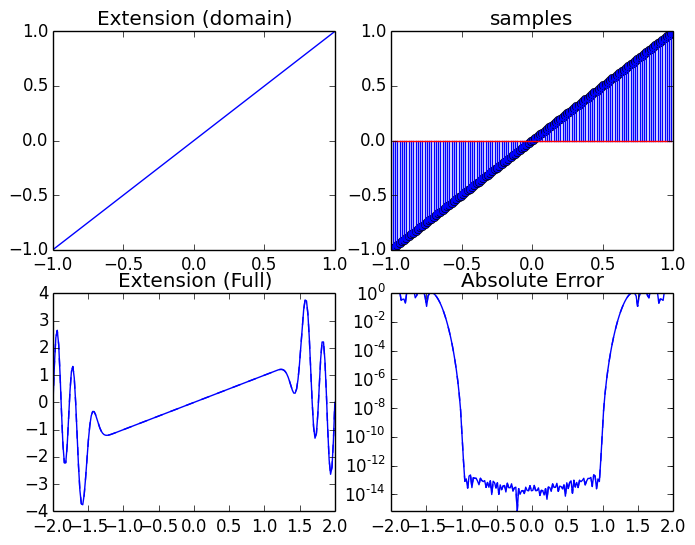

PyObject <matplotlib.text.Text object at 0x31f70c990>

In [51]:
subplot(221); FrameFuns.plot(f1)
subplot(222); plot_samples(f1)
subplot(223); plot_expansion(f1)
subplot(224); plot_error(f1, x->x)

In [52]:
f1(0.5)

0.5000000000000608 + 3.683164884193957e-13im

In [53]:
f2 = ExpFun( x-> cos(50*x), Interval(-1.0,1.0), n=71)

A 1-dimensional FrameFun with 71 degrees of freedom.
Basis: Fourier series, mapped to [ -2.0  ,  2.0 ]
Domain: the interval [-1.0, 1.0]


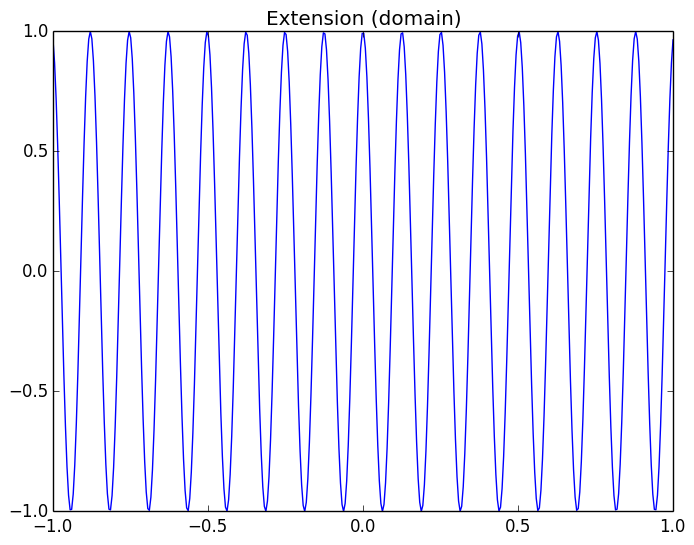

PyObject <matplotlib.text.Text object at 0x31f89a990>

In [54]:
FrameFuns.plot(f2,n=400)

In [55]:
f3 = ChebyFun(x -> cos(10*x.^2),Interval(-1.0,1.0), n=41,T=1.1)

A 1-dimensional FrameFun with 41 degrees of freedom.
Basis: Chebyshev series (first kind), mapped to [ -1.0975609756097562  ,  1.0975609756097562 ]
Domain: the interval [-1.0, 1.0]


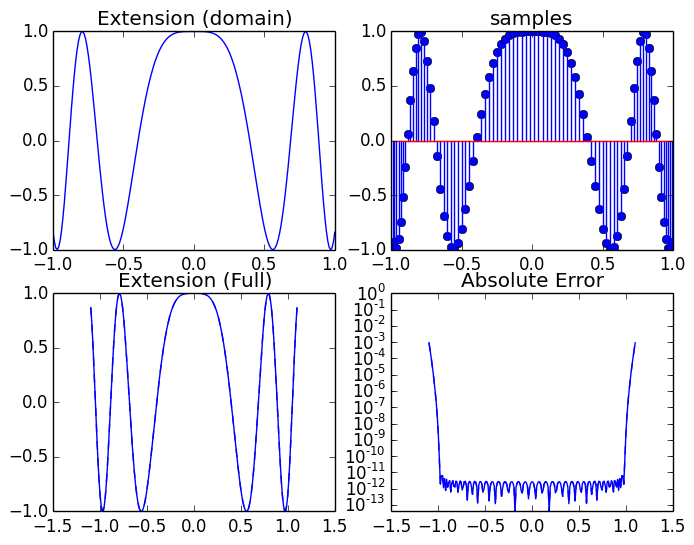

PyObject <matplotlib.text.Text object at 0x32871e110>

In [56]:
subplot(221); FrameFuns.plot(f3)
subplot(222); plot_samples(f3)
subplot(223); plot_expansion(f3)
subplot(224); plot_error(f3, x->cos(10*x.^2))

Interact.Slider{Float64}([Reactive.Input{Float64}] 2.0,"myT",2.0,1.0:0.05:3.0)

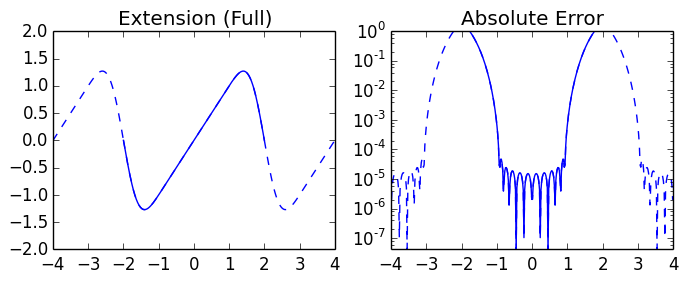

In [71]:
h=figure()
@manipulate for myT=1.0:0.05:3.0; withfig(h) do
        F=ExpFun(x->x,T=myT,n=11)
        subplot(221); plot_expansion(F,repeats=1); xlim([-4; 4]); ylim([-2; 2])
        subplot(222); plot_error(F, x->x,repeats=1); xlim([-4; 4]); ylim([-10^16; 1])
    end
end

### 2D approximations

##### Simple domains and simple functions

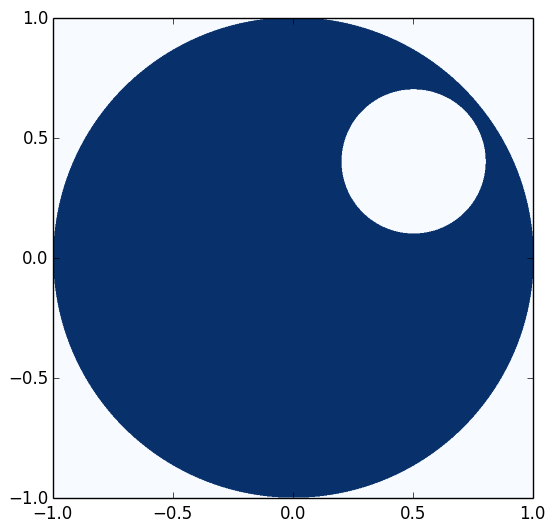

PyObject <matplotlib.image.AxesImage object at 0x316451210>

In [9]:
C = Disk(1.0)- Disk(0.3,[0.4; 0.5]); FrameFuns.plot_domain(C, n=1000)

In [78]:
f(x,y) = exp(x+y)

f (generic function with 1 method)

In [79]:
f2 = ExpFun(f,C)

A 2-dimensional FrameFun with 961 degrees of freedom.
Basis: tensor product (Fourier series, mapped to [ -1.1935483870967742  ,  1.1935483870967742 ] x Fourier series, mapped to [ -1.1935483870967742  ,  1.1935483870967742 ])
Domain: the difference of two domains: 
    First domain: a circle of radius 1.0 centered at [0.0,0.0]
    Second domain: a circle of radius 1.0 centered at [0.0,0.0]



In [80]:
f2(-0.6, 0.4)

0.8187310719393963 + 1.838998286984861e-9im

In [81]:
exp(-0.6+0.4)

0.8187307530779819

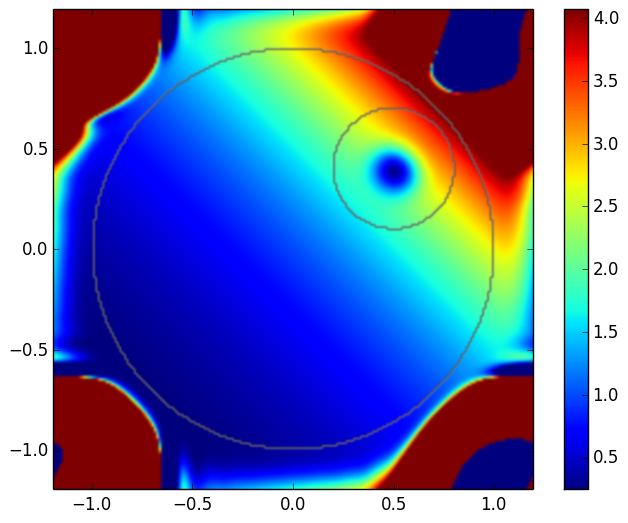

PyObject <matplotlib.colorbar.Colorbar instance at 0x315263098>

In [14]:
plot_image(f2,n=200)

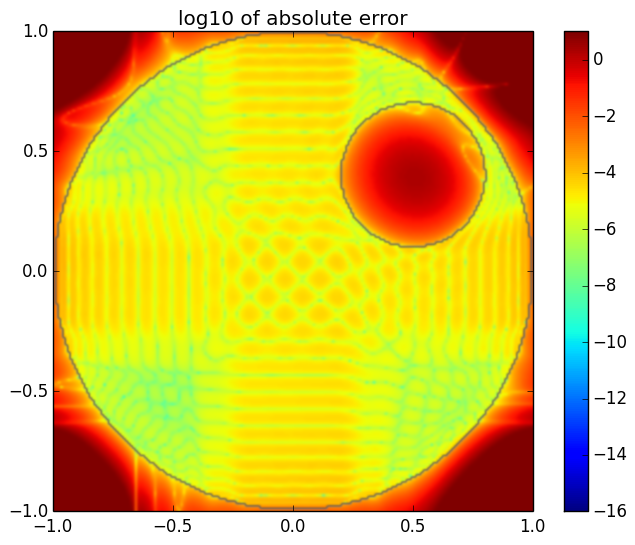

PyObject <matplotlib.text.Text object at 0x32c7f8750>

In [15]:
plot_error(f2,f)

##### Simple domains and harder functions

In [18]:
dom = FrameFuns.randomcircles(10)

a collection of 10 domains

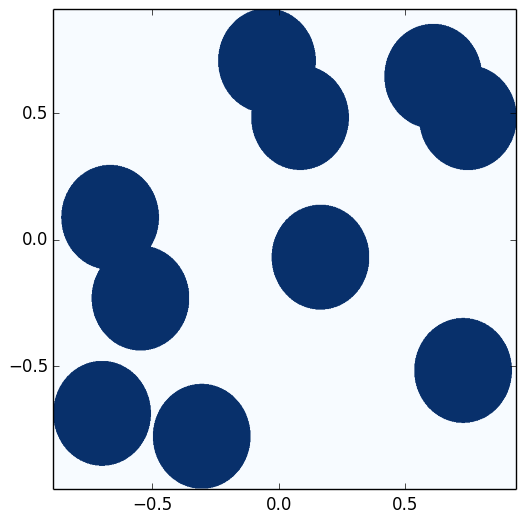

In [19]:
FrameFuns.plot_domain(dom,n=1000);

In [20]:
f2 = ExpFun( (x,y) -> cos(40*(x+y)), dom, n=(31,31), T=(1.2,1.2))

A 2-dimensional FrameFun with 961 degrees of freedom.
Basis: tensor product (Fourier series, mapped to [ -1.0713663960666184  ,  1.1150168968300171 ] x Fourier series, mapped to [ -1.170736999700165  ,  1.0933283073981772 ])
Domain: a collection of 10 domains


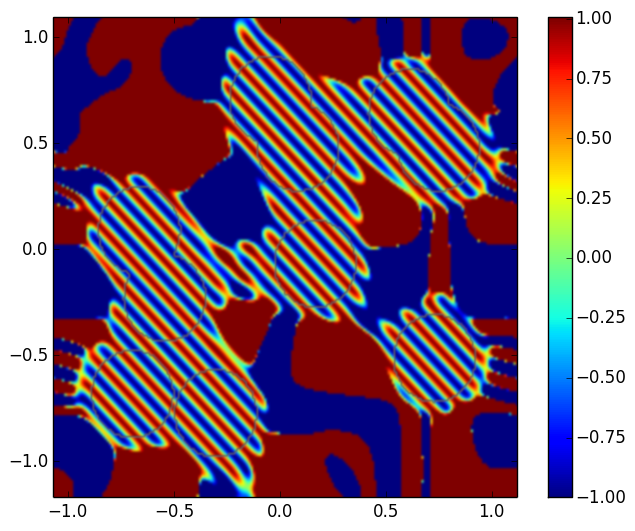

PyObject <matplotlib.colorbar.Colorbar instance at 0x3164f54d0>

In [21]:
plot_image(f2,n=200)

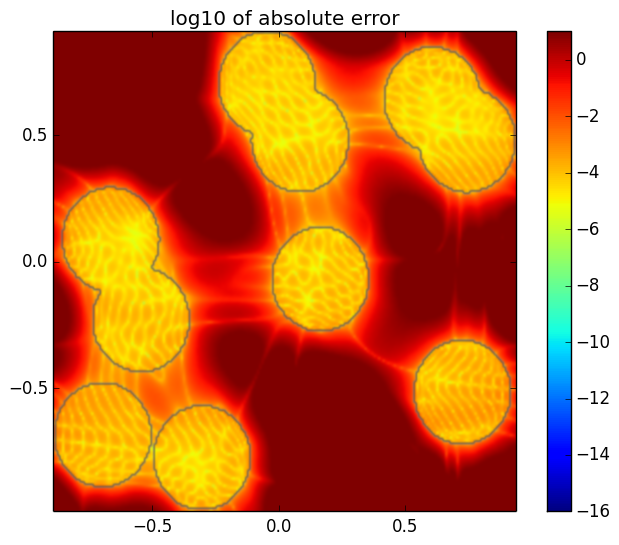

PyObject <matplotlib.text.Text object at 0x317e3bb10>

In [23]:
plot_error(f2, (x,y) -> cos(40*(x+y)))

In [24]:
FrameFuns.BBox2

FrameFuns.BBox{2,T}

##### Fractal domains

In [25]:
mandelbrot=FrameFuns.Mandelbrot()

The Mandelbrot set

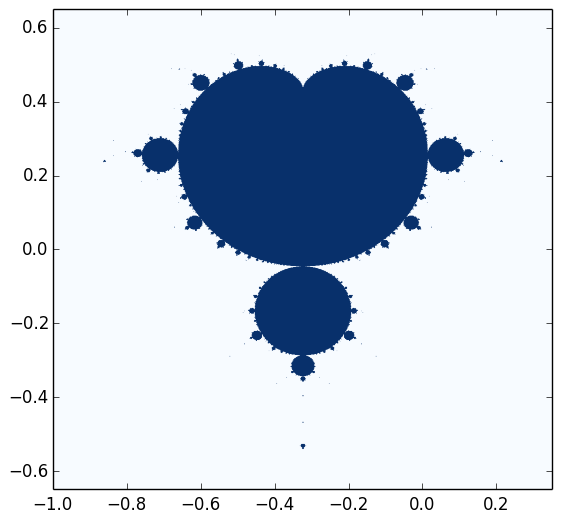

PyObject <matplotlib.image.AxesImage object at 0x318c89450>

In [26]:
plot_domain(mandelbrot, n=1001)

In [72]:
f1 = ExpFun( (x,y) -> cos(x*y), mandelbrot)

A 2-dimensional FrameFun with 961 degrees of freedom.
Basis: tensor product (Fourier series, mapped to [ -1.1306451612903226  ,  0.48064516129032264 ] x Fourier series, mapped to [ -0.7758064516129033  ,  0.7758064516129033 ])
Domain: The Mandelbrot set


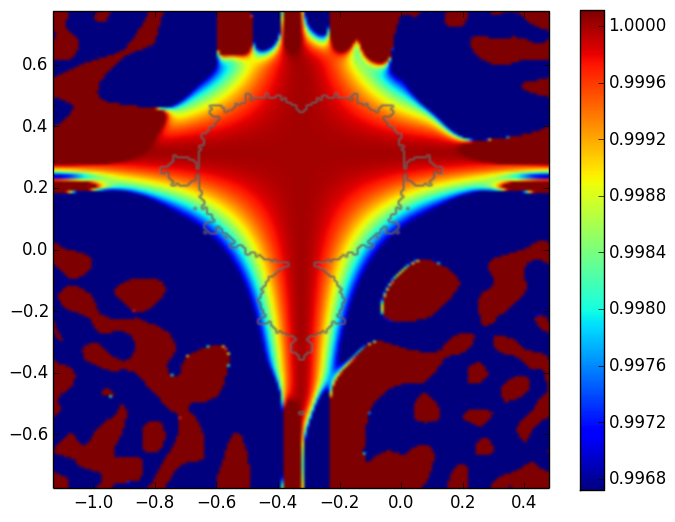

PyObject <matplotlib.colorbar.Colorbar instance at 0x31de389e0>

In [73]:
plot_image(f1,n=201)

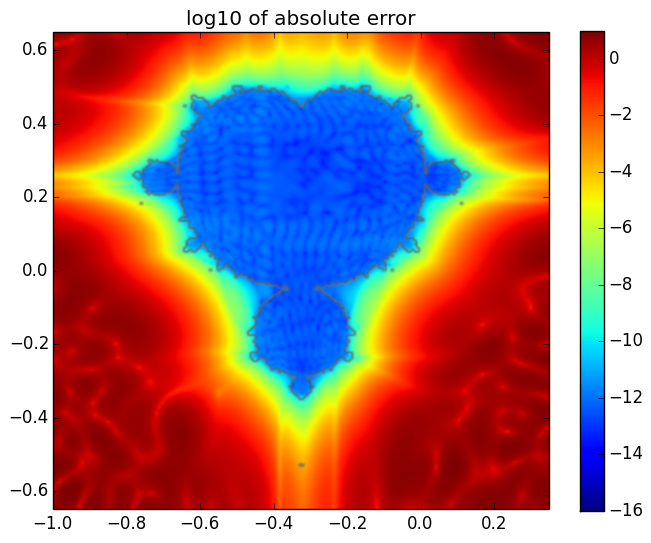

PyObject <matplotlib.text.Text object at 0x31c9bbb10>

In [76]:
plot_error(f1,(x,y) -> cos(x*y),n=201)

In [30]:
julia = JuliaSet()

A particular Julia Set also known as the Douady rabbit

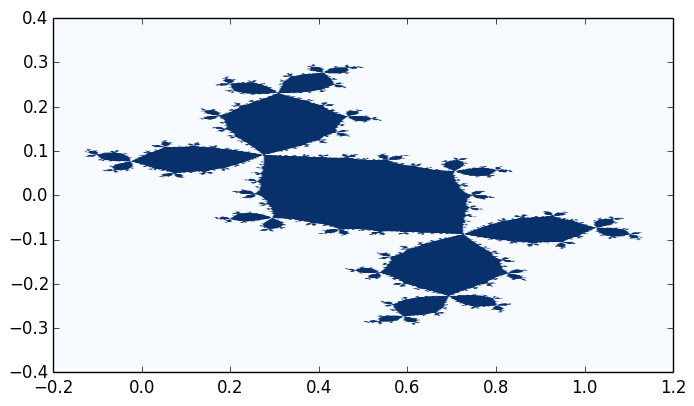

PyObject <matplotlib.image.AxesImage object at 0x31bc09710>

In [31]:
plot_domain(julia)

In [32]:
f2 = ExpFun( (x,y) -> cos(10*x*y), julia, dof=31)

A 2-dimensional FrameFun with 961 degrees of freedom.
Basis: tensor product (Fourier series, mapped to [ -0.33548387096774196  ,  1.335483870967742 ] x Fourier series, mapped to [ -0.47741935483870973  ,  0.47741935483870973 ])
Domain: A particular Julia Set also known as the Douady rabbit


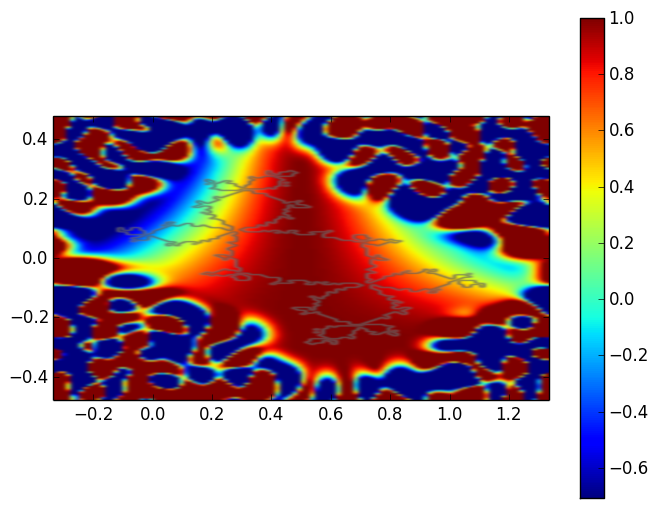

PyObject <matplotlib.colorbar.Colorbar instance at 0x31670abd8>

In [33]:
plot_image(f2)

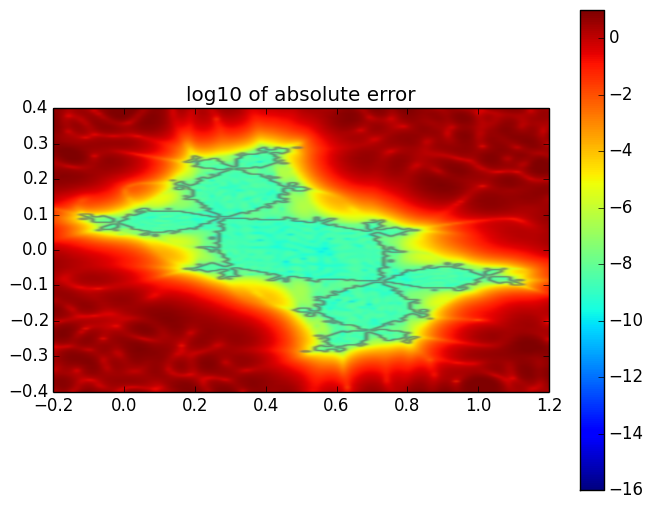

PyObject <matplotlib.text.Text object at 0x3195935d0>

In [34]:
plot_error(f2, (x,y) -> cos(10*x*y))

### 3D approximations

##### Simple domains and simple functions

In [36]:
S = Sphere(1.0)

LoadError: LoadError: UndefVarError: Sphere not defined
while loading In[36], in expression starting on line 1

In [37]:
plot(S)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[37], in expression starting on line 1

In [38]:
f3 = ExpFun( (x,y,z) -> cos(x-2y+3z), Sphere(1.0), dof=5)

LoadError: LoadError: UndefVarError: Sphere not defined
while loading In[38], in expression starting on line 1

In [39]:
plot(f3)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[39], in expression starting on line 1

In [40]:
plotslice(f3)

LoadError: LoadError: UndefVarError: plotslice not defined
while loading In[40], in expression starting on line 1

##### Harder domains

In [41]:
atom = atomium()

LoadError: LoadError: MethodError: `+` has no method matching +(::FixedSizeArrays.Vec{3,Float64}, ::Array{Float64,1})
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...)
  +{S,T}(!Matched::Range{S}, ::AbstractArray{T,N})
  +(!Matched::SparseMatrixCSC{Tv,Ti<:Integer}, ::Array{T,N})
  ...
while loading In[41], in expression starting on line 1

In [42]:
plot(atomium, n=50)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[42], in expression starting on line 1

In [43]:
f3 = ExpFun( (x,y,z) -> cos(x+y-2*z), atomium, dof=5)

LoadError: LoadError: MethodError: `numtype` has no method matching numtype(::Function)
while loading In[43], in expression starting on line 1

In [44]:
plot(f3)

LoadError: LoadError: UndefVarError: plot not defined
while loading In[44], in expression starting on line 1

In [45]:
plotslice(f3)

LoadError: LoadError: UndefVarError: plotslice not defined
while loading In[45], in expression starting on line 1

##### Harder functions?

In [46]:
f3 = ExpFun( (x,y,z) -> cos(40*(x+y-2*z)), unitsphere, dof=21, method="lsqr")

LoadError: LoadError: UndefVarError: unitsphere not defined
while loading In[46], in expression starting on line 1

In [47]:
plotslice(f3)

LoadError: LoadError: UndefVarError: plotslice not defined
while loading In[47], in expression starting on line 1

In [48]:
f3 = ExpFun( (x,y,z) -> cos(40*(x+y-2*z)), unitsphere, dof=51, method="lsqr")

LoadError: LoadError: UndefVarError: unitsphere not defined
while loading In[48], in expression starting on line 1